In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, plot_confusion_matrix

In [2]:
data = pd.read_csv('E:\github\DS-Olympus-\machineLearning\irisSpeciesClassification\Dataset\Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.drop("Id", axis=1, inplace=True)

In [6]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
data["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [36]:
# null values??
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# features & Target
features = data.drop("Species",axis=1)
target = data["Species"]

In [19]:
scaler = MinMaxScaler()
new_features = scaler.fit_transform(features)
print("------------ NEW FEATURES -------------")
print(pd.DataFrame(new_features).head())

------------ NEW FEATURES -------------
          0         1         2         3
0  0.222222  0.625000  0.067797  0.041667
1  0.166667  0.416667  0.067797  0.041667
2  0.111111  0.500000  0.050847  0.041667
3  0.083333  0.458333  0.084746  0.041667
4  0.194444  0.666667  0.067797  0.041667


In [20]:
x_train, x_test, y_train, y_test = train_test_split(new_features,target,random_state=123)

In [33]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

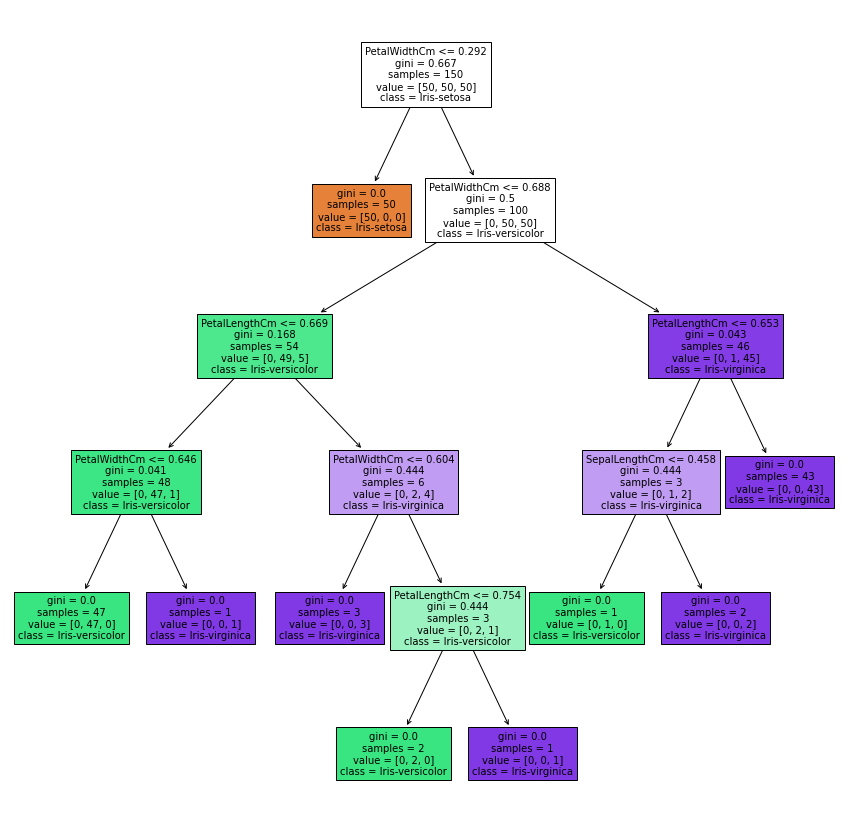

In [42]:
model = DecisionTreeClassifier()
abc = model.fit(new_features,target)


# graphical tree
plt.figure(figsize=(15,15))
plot_tree(abc, fontsize=10,feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm',], filled=True,class_names=
["Iris-setosa","Iris-versicolor","Iris-virginica"])
plt.show()


In [45]:
y_pred = model.predict(x_test)
cr = classification_report(y_test,y_pred)
print("-------------------- CLASSIFICATION REPORT --------------------")
print(cr)

-------------------- CLASSIFICATION REPORT --------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



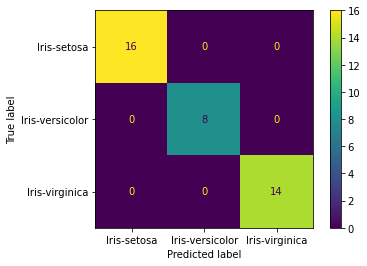

In [49]:
plot_confusion_matrix(abc,x_test,y_test)
plt.show()